In [2]:
import pandas as pd
import matplotlib.pyplot as mp

#https://data.cdc.gov/Heart-Disease-Stroke-Prevention/Stroke-Mortality-Data-Among-US-Adults-35-by-State-/vutr-sfkh/about_data
df = pd.read_csv("/lakehouse/default/Files/Stroke_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County___2019-2021.csv")
display(df)

StatementMeta(, 16ce018c-7cc2-4493-a0af-6c959500b362, 4, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, dd01a1aa-4d0f-4dfb-bc83-1eba4b305668)

In [3]:
def clean_data(df):
    # Drop duplicate rows across all columns
    df = df.drop_duplicates()
    # Drop column: 'DataSource'
    df = df.drop(columns=['DataSource', 'StratificationCategory1', 'StratificationCategory2', 'TopicID', 'Class', 'Topic'])
    # Rename column 'Stratification1' to 'Gender'
    df = df.rename(columns={'Stratification1': 'Gender'})
    # Rename column 'Stratification2' to 'Race/Ethnicity'
    df = df.rename(columns={'Stratification2': 'Race/Ethnicity'})
    return df

df_clean = clean_data(df.copy())
df_clean.head()

StatementMeta(, 9e5fc74b-034a-4152-b2bc-4822a37b5a87, 9, Finished, Available, Finished)

,Year,LocationAbbr,LocationDesc,GeographicLevel,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,Gender,Race/Ethnicity,LocationID,Y_lat,X_lon,Georeference
0,2020,AK,Nome,County,110.7,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Male,Overall,2180,64.903977,-163.946230,POINT (-163.9462296 64.903977039)
1,2020,CT,Tolland County,County,63.4,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Female,Asian,9013,41.852990,-72.337294,POINT (-72.337294 41.852989582)
2,2020,DE,Delaware,State,67.7,"per 100,000 population","Age-adjusted, 3-year Average Rate",NaN,NaN,Overall,Asian,10,38.995200,-75.501400,POINT (-75.5014 38.9952)
3,2020,FL,Washington County,County,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Female,Hispanic,12133,30.614772,-85.660367,POINT (-85.66036722 30.614771948)
4,2020,IL,Winnebago County,County,69.5,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Female,Hispanic,17201,42.334491,-89.163280,POINT (-89.16328026 42.334491134)


In [5]:
def clean_data(df_clean):
    # Clone column 'Data_Value' as 'Data_Value_Complete'
    df_clean['Data_Value_Complete'] = df_clean.loc[:, 'Data_Value']
    # Change column type to string for column: 'Data_Value_Complete'
    df_clean = df_clean.astype({'Data_Value_Complete': 'string'})
    # Replace missing values with "Insufficient Data" in column: 'Data_Value_Complete'
    df_clean = df_clean.fillna({'Data_Value_Complete': "Insufficient Data"})
    # Clone column 'GeographicLevel' as 'GeoLevelCode'
    df_clean['GeoLevelCode'] = df_clean.loc[:, 'GeographicLevel']
    # Replace all instances of "Nation" with "1" in column: 'GeoLevelCode'
    df_clean.loc[df_clean['GeoLevelCode'].str.lower() == "Nation".lower(), 'GeoLevelCode'] = "1"
    # Replace all instances of "State" with "2" in column: 'GeoLevelCode'
    df_clean.loc[df_clean['GeoLevelCode'].str.lower() == "State".lower(), 'GeoLevelCode'] = "2"
    # Replace all instances of "County" with "3" in column: 'GeoLevelCode'
    df_clean.loc[df_clean['GeoLevelCode'].str.lower() == "County".lower(), 'GeoLevelCode'] = "3"
    # Drop columns: 'Year', 'Data_Value_Unit' and 4 other columns
    df_clean = df_clean.drop(columns=['Year', 'Data_Value_Unit', 'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'LocationID'])
    #Change column data type to int
    df_clean = df_clean.astype({'GeoLevelCode': 'int'})
    return df_clean

df_cleaner = clean_data(df_clean.copy())
df_cleaner.head()

StatementMeta(, 9e5fc74b-034a-4152-b2bc-4822a37b5a87, 17, Finished, Available, Finished)

,LocationAbbr,LocationDesc,GeographicLevel,Data_Value,Gender,Race/Ethnicity,Y_lat,X_lon,Georeference,Data_Value_Complete,GeoLevelCode
0,AK,Nome,County,110.7,Male,Overall,64.903977,-163.946230,POINT (-163.9462296 64.903977039),110.7,3
1,CT,Tolland County,County,63.4,Female,Asian,41.852990,-72.337294,POINT (-72.337294 41.852989582),63.4,3
2,DE,Delaware,State,67.7,Overall,Asian,38.995200,-75.501400,POINT (-75.5014 38.9952),67.7,2
3,FL,Washington County,County,NaN,Female,Hispanic,30.614772,-85.660367,POINT (-85.66036722 30.614771948),Insufficient Data,3
4,IL,Winnebago County,County,69.5,Female,Hispanic,42.334491,-89.163280,POINT (-89.16328026 42.334491134),69.5,3


StatementMeta(, 514aadd5-6e68-4b6d-812e-522acd373fa4, 105, Finished, Available, Finished)

<Axes: >

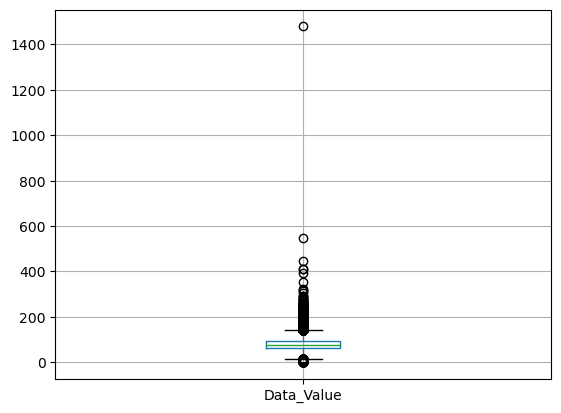

In [14]:
df_cleaner.boxplot("Data_Value")

In [3]:
print(df_clean.describe())

StatementMeta(, 514aadd5-6e68-4b6d-812e-522acd373fa4, 5, Finished, Available, Finished)

          Year    Data_Value    LocationID         Y_lat         X_lon
count  78792.0  29213.000000  78792.000000  78768.000000  78768.000000
mean    2020.0     81.141184  30922.418824     37.901745    -91.406452
std        0.0     30.357247  16737.598878      6.326381     15.942269
min     2020.0      0.000000      0.000000    -14.301754   -170.719474
25%     2020.0     62.800000  18133.000000     34.326243    -98.129615
50%     2020.0     77.500000  29205.000000     38.220930    -89.931055
75%     2020.0     94.100000  46089.000000     41.695739    -82.890640
max     2020.0   1479.200000  78030.000000     69.309529    145.751259


In [5]:
df_clean.info()

StatementMeta(, 87a3d308-e546-4f7f-9f0f-49e68d97ad48, 7, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78792 entries, 0 to 78791
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        78792 non-null  int64  
 1   LocationAbbr                78792 non-null  object 
 2   LocationDesc                78792 non-null  object 
 3   GeographicLevel             78792 non-null  object 
 4   Data_Value                  29213 non-null  float64
 5   Data_Value_Unit             78792 non-null  object 
 6   Data_Value_Type             78792 non-null  object 
 7   Data_Value_Footnote_Symbol  49579 non-null  object 
 8   Data_Value_Footnote         49579 non-null  object 
 9   Gender                      78792 non-null  object 
 10  Race/Ethnicity              78792 non-null  object 
 11  LocationID                  78792 non-null  int64  
 12  Y_lat                       78768 non-null  float64
 13  X_lon                       787

In [4]:
print(df.nunique())

StatementMeta(, 514aadd5-6e68-4b6d-812e-522acd373fa4, 6, Finished, Available, Finished)

Year                             1
LocationAbbr                    57
LocationDesc                  2022
GeographicLevel                  3
DataSource                       1
Class                            1
Topic                            1
Data_Value                    1854
Data_Value_Unit                  1
Data_Value_Type                  2
Data_Value_Footnote_Symbol       1
Data_Value_Footnote              1
StratificationCategory1          1
Stratification1                  3
StratificationCategory2          1
Stratification2                  8
TopicID                          1
LocationID                    3283
Y_lat                         3282
X_lon                         3282
Georeference                  3282
dtype: int64


In [ ]:
spark.createDataFrame(df_clean).write.saveAsTable("stroke_mortality_cleaned")

StatementMeta(, , , Waiting, , Waiting)

In [7]:
spark.createDataFrame(df_cleaner).write.saveAsTable("stroke_mortality_finalized_update")

StatementMeta(, 9e5fc74b-034a-4152-b2bc-4822a37b5a87, 19, Finished, Available, Finished)

In [4]:
state_names = pd.read_csv("/lakehouse/default/Files/states.csv")
state_names['index1'] = state_names.index
display(state_names)

StatementMeta(, 16ce018c-7cc2-4493-a0af-6c959500b362, 12, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, a9f42017-65bd-4e31-be3e-a40686b53bf9)

In [5]:
spark.createDataFrame(state_names).write.saveAsTable("state_names_labels")

StatementMeta(, 16ce018c-7cc2-4493-a0af-6c959500b362, 21, Finished, Available, Finished)